In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import datetime as dt
import matplotlib.font_manager as fm
from matplotlib import rc

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

font_name = fm.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [19]:
columns = ['사용자번호','이동순서','대여시간','위도','경도']
data = pd.read_csv('rentMove20190102.csv',encoding='utf-8',parse_dates=['대여시간'], names=columns)

In [20]:
sorted_data = data.sort_values(by=['사용자번호','대여시간','이동순서'])

In [17]:
sorted_data.head(50)

,사용자번호,이동순서,대여시간,위도,경도
2409073,1,1,2019-01-14 18:18:34,37.581306,126.885993
2409074,1,2,2019-01-14 18:18:34,37.578566,126.886178
2409075,1,3,2019-01-14 18:18:34,37.579643,126.887483
2409076,1,4,2019-01-14 18:18:34,37.579375,126.887533
2409077,1,5,2019-01-14 18:18:34,37.580696,126.889308
2409078,1,6,2019-01-14 18:18:34,37.578506,126.890341
2409079,1,7,2019-01-14 18:18:34,37.578585,126.895864
2409080,1,8,2019-01-14 18:18:34,37.575259,126.889010
2409081,1,9,2019-01-14 18:18:34,37.578296,126.894736
2409082,1,10,2019-01-14 18:18:34,37.576370,126.892678


In [21]:
sorted_data['월'] = sorted_data['대여시간'].dt.month
sorted_data['일'] = sorted_data['대여시간'].dt.day
sorted_data['시'] = sorted_data['대여시간'].dt.hour
sorted_data['분'] = sorted_data['대여시간'].dt.minute

In [22]:
sorted_data.head(50)

,사용자번호,이동순서,대여시간,위도,경도,월,일,시,분
2409073,1,1,2019-01-14 18:18:34,37.581306,126.885993,1,14,18,18
2409074,1,2,2019-01-14 18:18:34,37.578566,126.886178,1,14,18,18
2409075,1,3,2019-01-14 18:18:34,37.579643,126.887483,1,14,18,18
2409076,1,4,2019-01-14 18:18:34,37.579375,126.887533,1,14,18,18
2409077,1,5,2019-01-14 18:18:34,37.580696,126.889308,1,14,18,18
2409078,1,6,2019-01-14 18:18:34,37.578506,126.890341,1,14,18,18
2409079,1,7,2019-01-14 18:18:34,37.578585,126.895864,1,14,18,18
2409080,1,8,2019-01-14 18:18:34,37.575259,126.889010,1,14,18,18
2409081,1,9,2019-01-14 18:18:34,37.578296,126.894736,1,14,18,18
2409082,1,10,2019-01-14 18:18:34,37.576370,126.892678,1,14,18,18


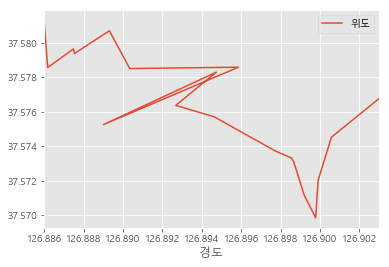

In [32]:
data_temp = sorted_data[0:19]
data_temp.plot(x='경도',y='위도')

In [52]:
data_temp

,사용자번호,이동순서,대여시간,위도,경도,월,일,시,분
2409073,1,1,2019-01-14 18:18:34,37.581306,126.885993,1,14,18,18
2409074,1,2,2019-01-14 18:18:34,37.578566,126.886178,1,14,18,18
2409075,1,3,2019-01-14 18:18:34,37.579643,126.887483,1,14,18,18
2409076,1,4,2019-01-14 18:18:34,37.579375,126.887533,1,14,18,18
2409077,1,5,2019-01-14 18:18:34,37.580696,126.889308,1,14,18,18
2409078,1,6,2019-01-14 18:18:34,37.578506,126.890341,1,14,18,18
2409079,1,7,2019-01-14 18:18:34,37.578585,126.895864,1,14,18,18
2409080,1,8,2019-01-14 18:18:34,37.575259,126.889010,1,14,18,18
2409081,1,9,2019-01-14 18:18:34,37.578296,126.894736,1,14,18,18
2409082,1,10,2019-01-14 18:18:34,37.576370,126.892678,1,14,18,18


In [63]:
# define a function to draw a basemap easily
def generateBaseMap(default_location=[37.547, 126.992], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

data_copy = data_temp.copy()
# select a zipcode for the heatmap
# set(home['zipcode'])
# home_copy = home[home['zipcode']==98178].copy()
# data_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
# folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
#               icon=folium.Icon(color='red')).add_to(s)
# add heatmap
for i in loc_list:
    folium.Marker(i).add_to(s)
folium.PolyLine(loc_list, color='red',weight=2.5, opacity=1).add_to(s)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

In [58]:
loc_list = data_temp[['위도','경도']].values.tolist()

In [59]:
for i in loc_list:
    print(i)

[37.581306, 126.885993]
[37.578565999999995, 126.886178]
[37.579643, 126.887483]
[37.579375, 126.887533]
[37.580696, 126.88930800000001]
[37.578506, 126.89034099999999]
[37.578585, 126.89586399999999]
[37.575259, 126.88901000000001]
[37.578296, 126.89473600000001]
[37.576370000000004, 126.892678]
[37.575711, 126.894623]
[37.573728, 126.897729]
[37.573333, 126.89853799999999]
[37.573116, 126.898661]
[37.571183000000005, 126.899193]
[37.569848, 126.899781]
[37.572026, 126.899904]
[37.574526, 126.90057900000001]
[37.576759, 126.902988]
